<a href="https://colab.research.google.com/github/AnujKAksh89/PlayStoreAnalysis/blob/main/Netflix_Movies_And_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Netflix is a company that manages a large collection of TV shows and movies, streaming it anytime via online. This business is profitable because users make a monthly payment to access the platform. However, customers can cancel their subscriptions at any time. Therefore, the company must keep the users hooked on the platform and not lose their interest. This is where recommendation systems start to play an important role, providing valuable suggestions to users is essential.

Netflix’s recommendation system helps them increase their popularity among service providers as they help increase the number of items sold, offer a diverse selection of items, increase user satisfaction, as well as user loyalty to the company, and they are very helpful in getting a better understanding of what the user wants. Then it’s easier to get the user to make better decisions from a wide variety of movie products. With over 139 million paid subscribers (total viewer pool -300 million) across 190 countries, 15,400 titles across its regional libraries and 112 Emmy Award Nominations in 2018 — Netflix is the world’s leading Internet television network and the most-valued largest streaming service in the world. The amazing digital success story of Netflix is incomplete without the mention of its recommender systems that focus on personalization. There are several methods to create a list of recommendations according to preferences.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, required tasks are,
* Exploratory Data Analysis

* Understanding what type content is available in different countries

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import nltk
import pandas as pd
import numpy as np
import spacy
import re
import string
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import TweetTokenizer # tokenizing
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from numpy import math
import math

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.cluster import KMeans
from scipy import stats

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_4/Netflix_Movies_And_TV_Shows/'
net_df = pd.read_csv(working_directory + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
net_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
net_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

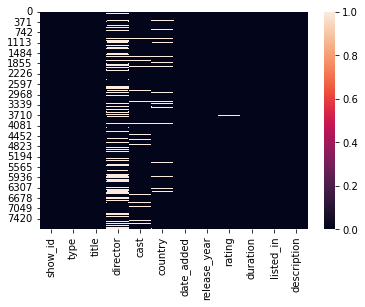

In [ ]:
# Visualizing the missing values
sns.heatmap(net_df.isnull(), cbar=True)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

## ***2. Understanding Your Variables***

In [ ]:
net_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Dataset Columns
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Attribute Information:
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#adding columns of month, duration in minutes of addition
net_df['month'] = pd.DatetimeIndex(net_df['date_added']).month
net_df['minute'] = net_df['duration'].str.extract('(\d+)').apply(pd.to_numeric)

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
net_df['target_ages'] = net_df['rating'].replace(ratings)

In [ ]:
# type should be a categorised
net_df['type'] = pd.Categorical(net_df['type'])
net_df['target_ages'] = pd.Categorical(net_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
new_df = net_df.copy()

In [ ]:
# Change director, cast, country, and listed_in columns from type str to lists
new_df.director = new_df.director.str.split(', ').tolist()
new_df.cast = new_df.cast.str.split(', ').tolist()
new_df.country = new_df.country.str.split(', ').tolist()
new_df.listed_in = new_df.listed_in.str.split(', ').tolist()

In [ ]:
# Splitting the duration column, and changing the datatype to integer
new_df['duration'] = new_df['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?

1. Added two columns:
    * month: relase month
    * minute: duration in minutes
2. Changed director, cast, country, and listed_in columns from type str to lists.
3. Split the duration column, and changing the datatype to integer.
4. Categorized type feature.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

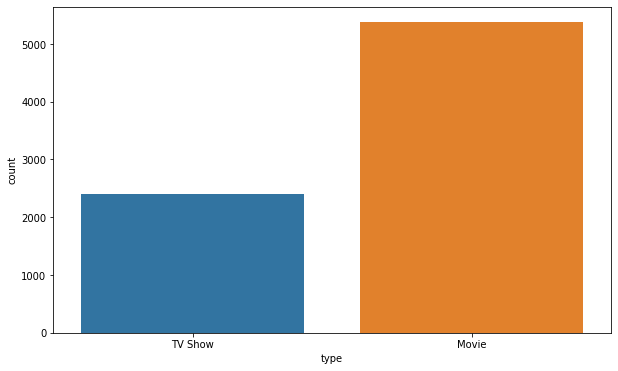

In [ ]:
#countplot to visualize the number of movies and tv_shows in type column
plt.figure(figsize=(10,6))
sns.countplot(net_df['type'])

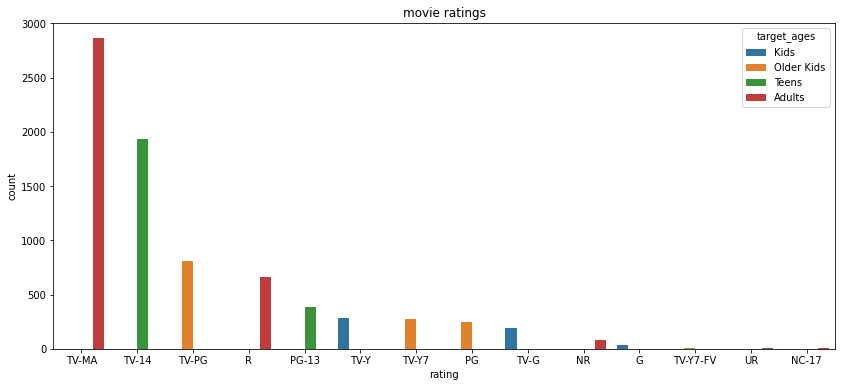

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=new_df['rating'], hue=new_df['target_ages'], data=new_df, order=new_df['rating'].value_counts().index)

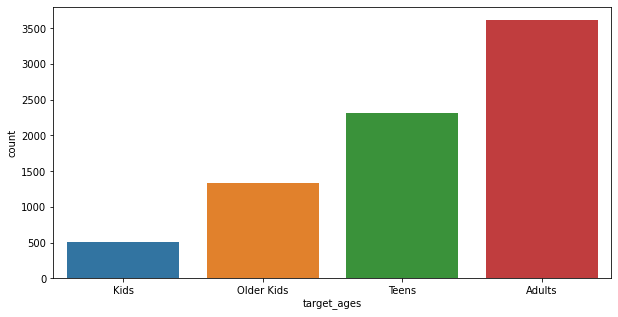

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages', data=new_df)

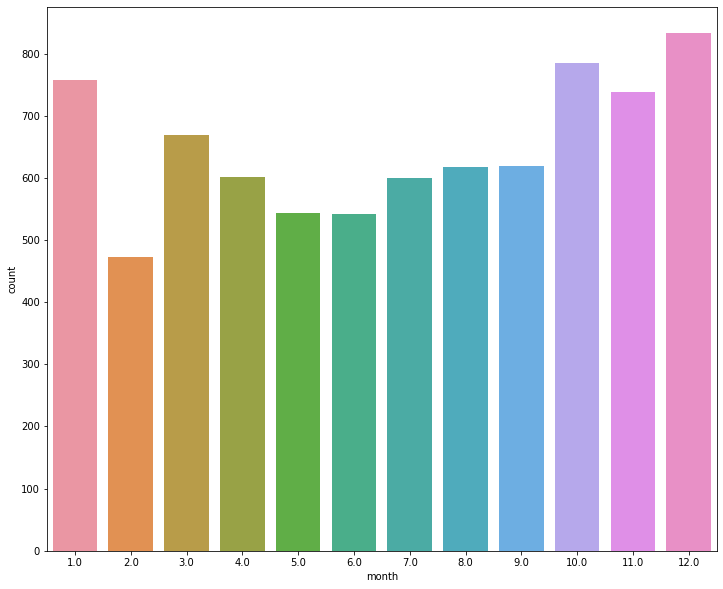

In [ ]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('month',data = new_df)

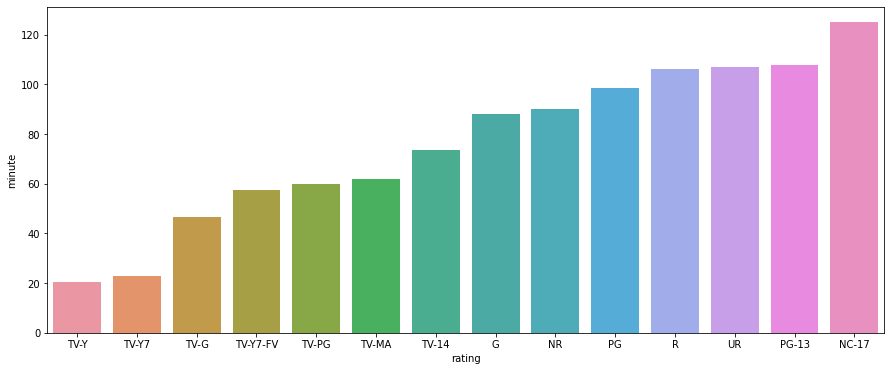

In [ ]:
duration_year = new_df.groupby(['rating'])['minute'].mean()
duration_df = pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(15,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

Text(0.5, 1.0, 'Top 10 movie directors')

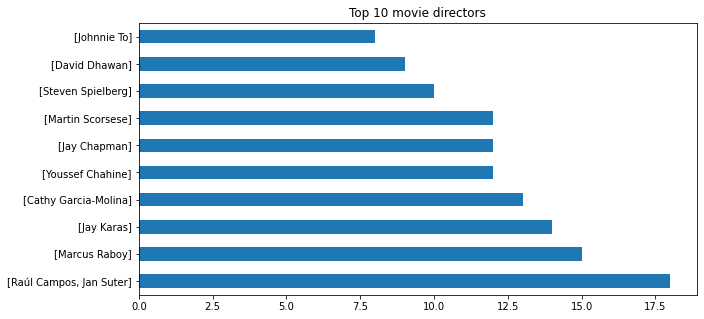

In [ ]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
new_df[~(new_df['director']=='Unknown') & (new_df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 movie directors')

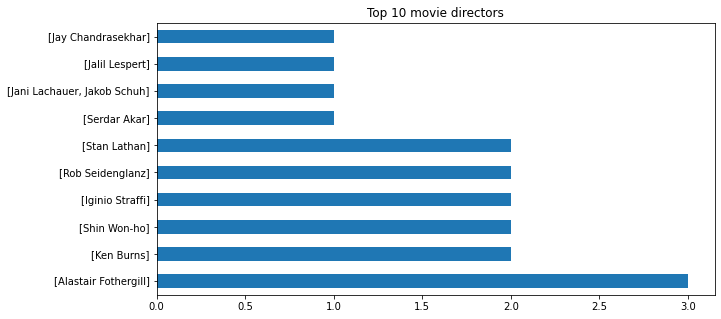

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
new_df[~(new_df['director']=='Unknown') & (new_df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

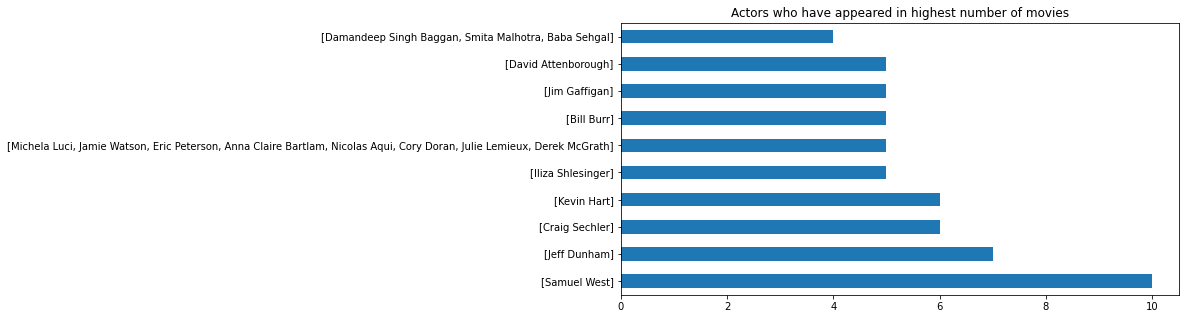

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
new_df[~(new_df['cast']=='Unknown') & (new_df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

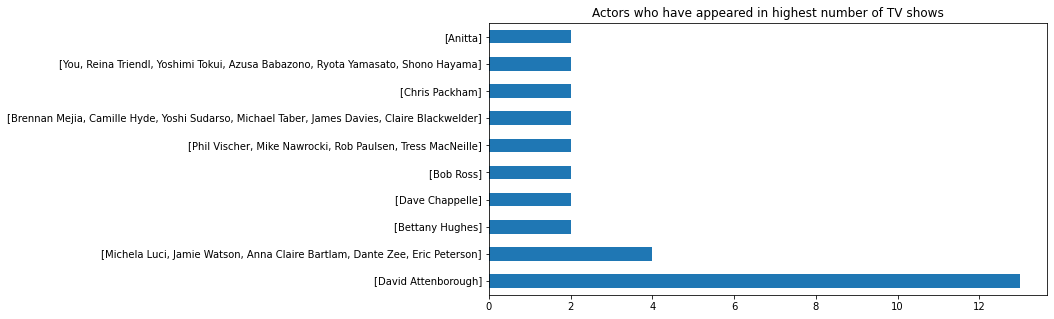

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
new_df[~(new_df['cast']=='Unknown') & (new_df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

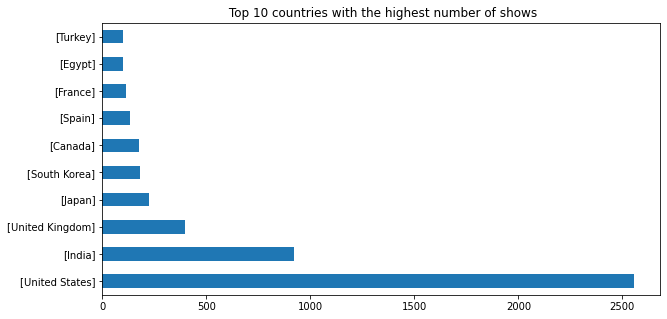

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
new_df[~(new_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of shows')

Text(0.5, 1.0, 'Top 10 genres for movies')

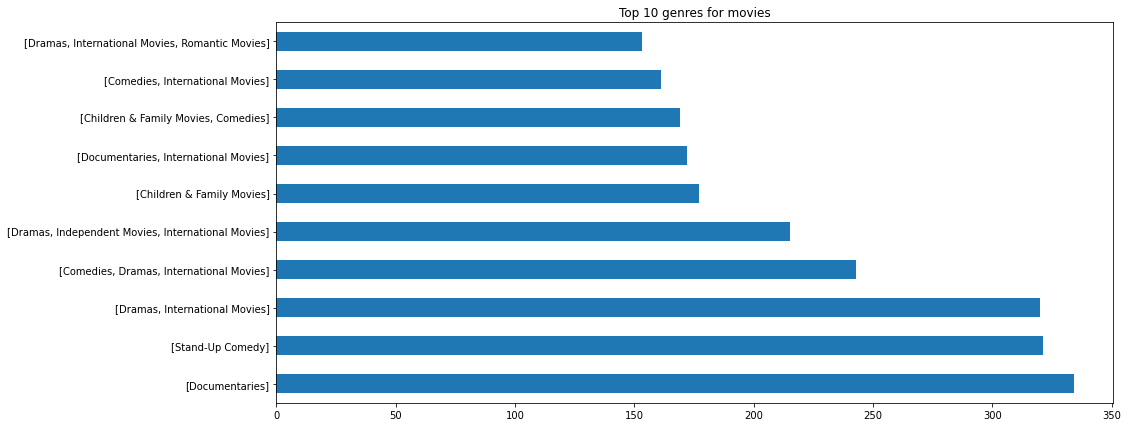

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(15,7))
new_df[new_df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV shows')

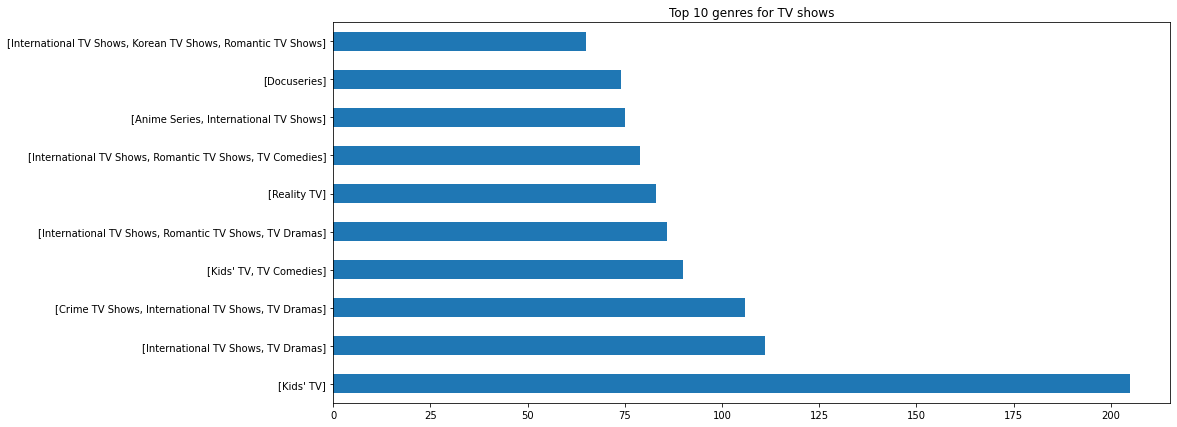

In [ ]:
# Top 10 genre for TV Shows
plt.figure(figsize=(15,7))
new_df[new_df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV shows')

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

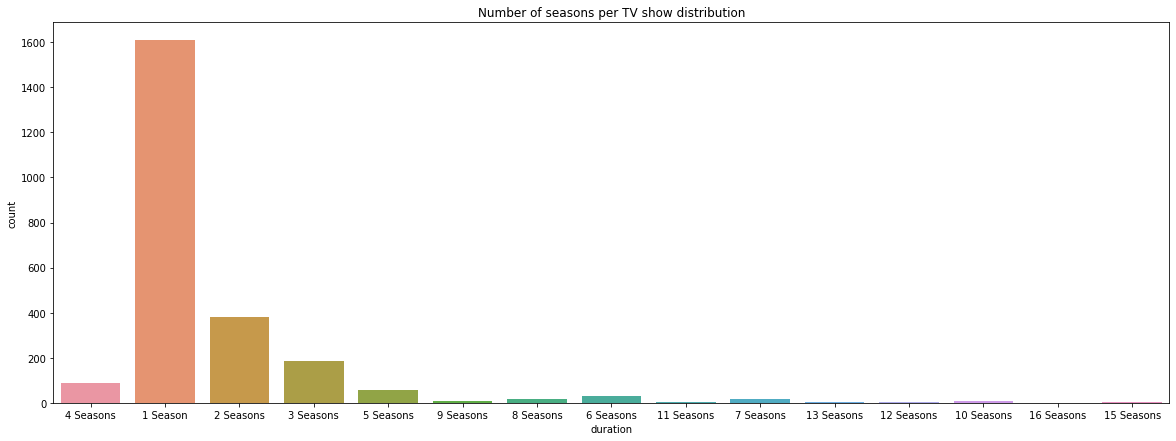

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(20,7))
p = sns.countplot(x='duration',data=new_df[new_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

##### 1. Why did you pick the specific chart?

A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories. I've used it here for univariate visualization

##### 2. What is/are the insight(s) found from the chart?

* There are more movies than TV shows in the dataset.
* Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG.
* Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.
* Over the years a greater number of shows were added in the months of October, November, December, and January.
* Those movies that have a rating of NC-17 have the longest average duration. When it comes to movies having a TV-Y rating, they have the shortest runtime on average.
* Raul Campos and Jan Suter jointly have directed highest number of movies (18 movies).
* Alastair Fothergill has directed highest number of TV Shows (3 TV Shows).
* Only six directors have directed more than one television show.
* Samuel West (10 movies) has worked in highest number of movies followd by Jeff Dunham (7 movies) and Craig Sechkler (6 movies).
* David Attenborough (13 TV Shows) has worked in highest number or TV Shows.
* The highest number of movies / TV shows were based out of the US, followed by India and UK.
* The documentaries is the most popular genre in movies followed by stand-up comedy and dramas.
* The kids' TV is the most popular genre in TV shows followed by TV dramas and Crime TV shows.
* Most the TV shows have onle one season.

##### 3. Will the gained insights help creating a positive business impact?

* Knowing details about the rating businesses can categorise their shows to specifically different age groups.
* Similarly director, genre, cast, etc. details can help the organization to categorise the movies and TV shows.

#### Chart - 2

Text(0.5, 1.0, 'distribution by released year')

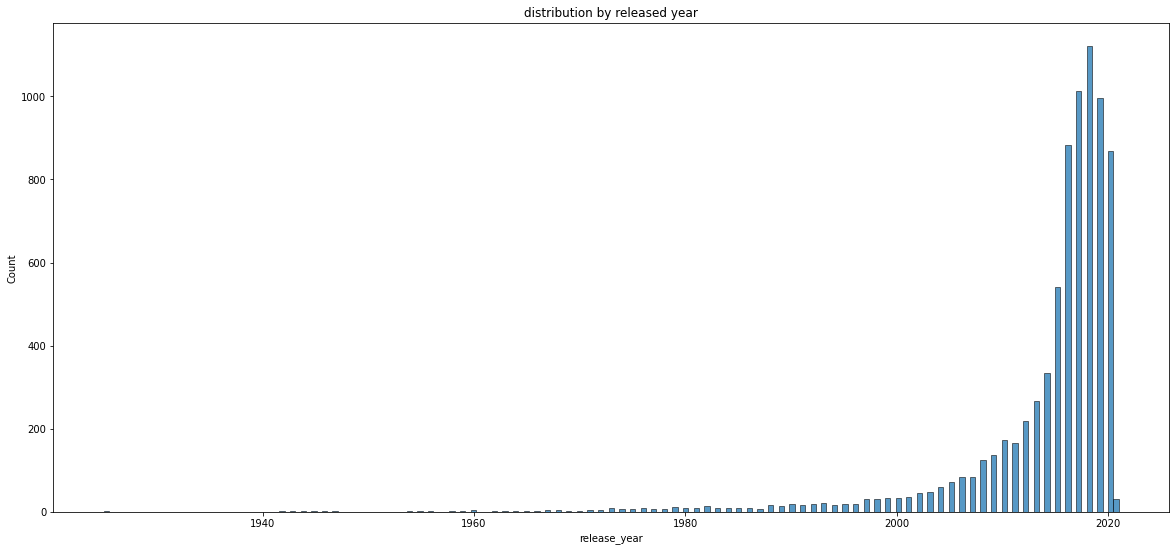

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(20,9))
sns.histplot(new_df['release_year'])
plt.title('distribution by released year')

Text(0.5, 1.0, 'Movie duration distribution')

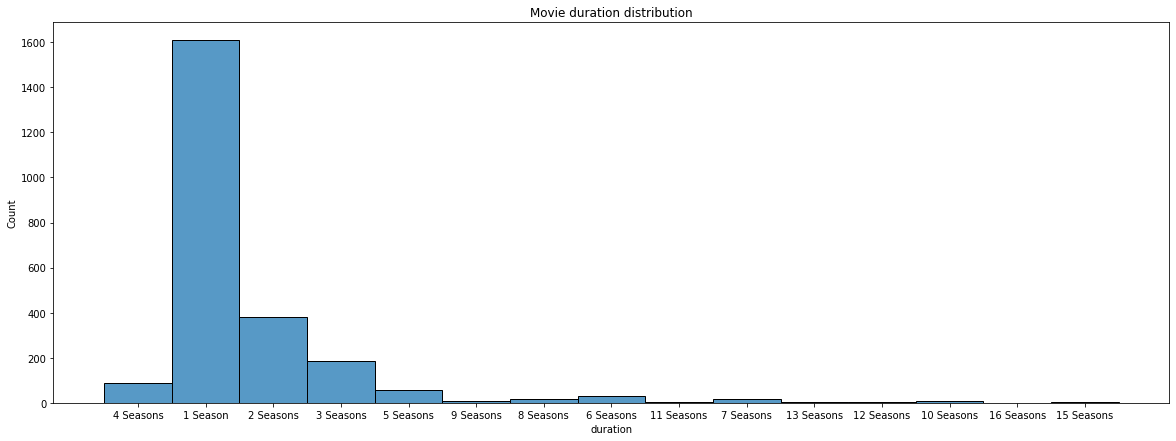

In [ ]:
# length of TV Shows analysis
plt.figure(figsize=(20,7))
sns.histplot(x='duration',data=new_df[new_df['type']=='TV Show'])
plt.title('Movie duration distribution')

Text(0.5, 1.0, 'Movie duration distribution')

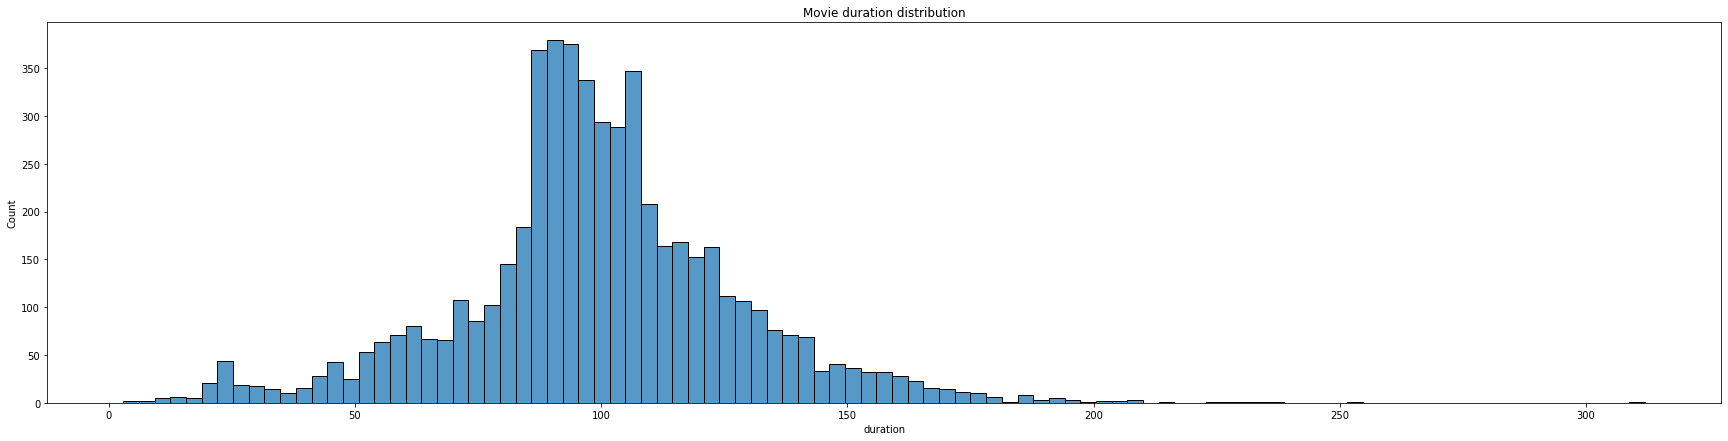

In [ ]:
# length of movie analysis
plt.figure(figsize=(30,7))
sns.histplot(x='duration',data=new_df[new_df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

A bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories. I've used it here to show distribution.

##### 2. What is/are the insight(s) found from the chart?

* Highest number of movies released in 2020.
* We can see huge increase in the number of movies and television episodes after 2015.
* The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

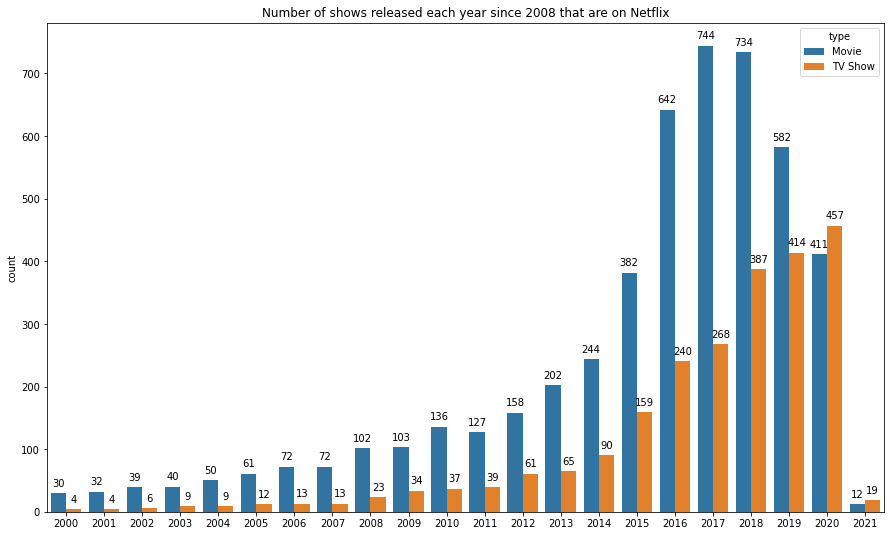

In [ ]:
# Number of shows released each year since 2008
order = range(2000,2022)
plt.figure(figsize=(15,9))
p = sns.countplot(x='release_year',data=new_df, hue='type', order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

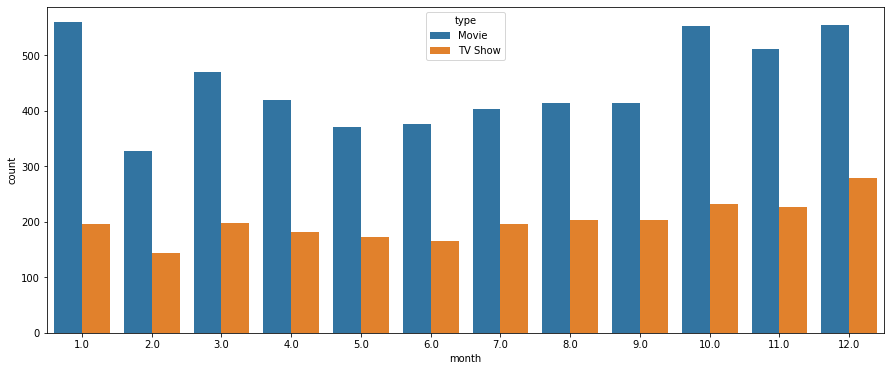

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month', hue='type',lw=5, data=new_df, ax=ax)

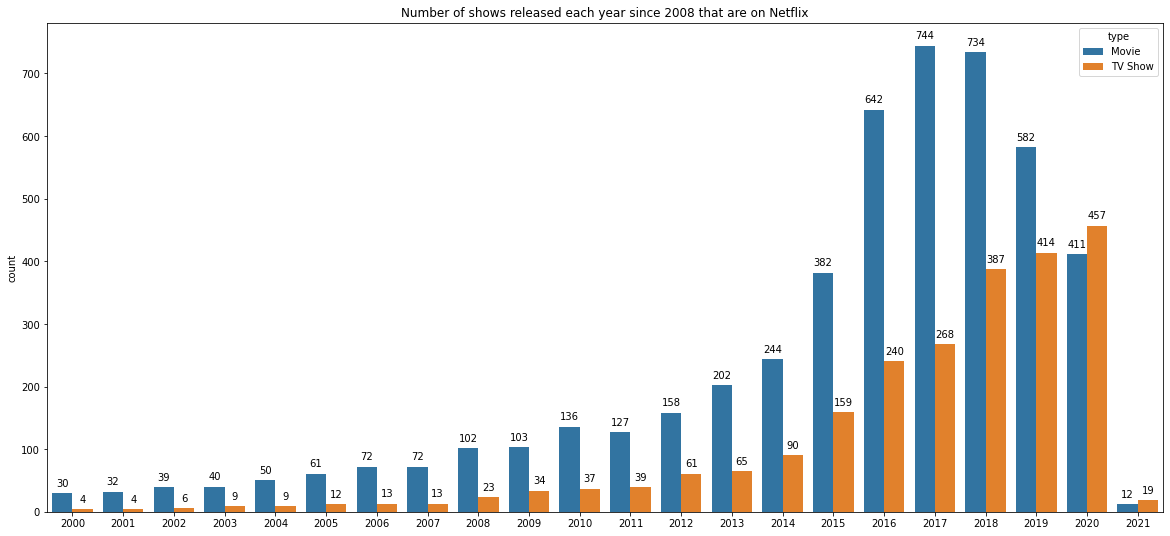

In [ ]:
# Number of shows released each year since 2008
order = range(2000,2022)
plt.figure(figsize=(20,9))
p = sns.countplot(x='release_year', data=new_df, hue='type', order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<BarContainer object of 11 artists>

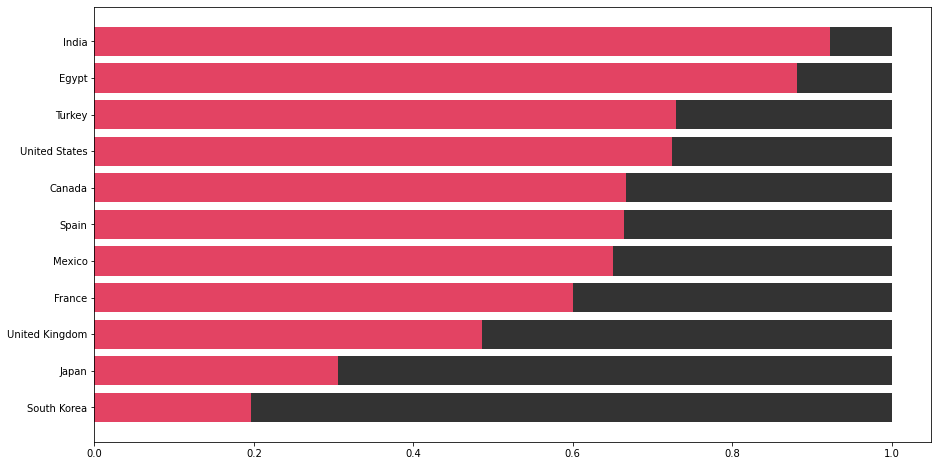

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = net_df['country'].value_counts()[:11].index
content_data = net_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)
ax.barh(content_data_ratio.index, content_data_ratio['Movie'], color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], color='black', alpha=0.8, label='TV Show')

##### 1. Why did you pick the specific chart?

 A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable which show the counts of observations in each categorical bin using bars. I've used this chart for bivariate visualization.

##### 2. What is/are the insight(s) found from the chart?

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.
* Most contents were added to Netflix from October to January.
* India has highest number of movies in netflix followed by Egypt and Turkey.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

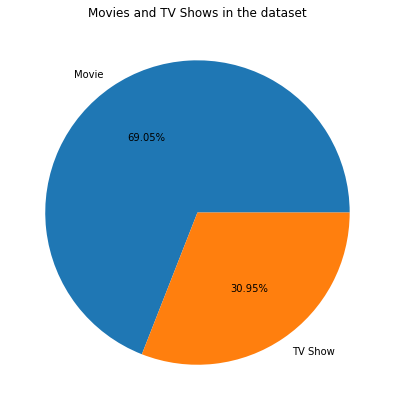

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
new_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges. The area of the wedge is determined by the length of the arc of the wedge. The area of a wedge represents the relative percentage of that part with respect to whole data. Pie charts are commonly used in business presentations like sales, operations, survey results, resources, etc as they provide a quick summary. I've used pie chart to represent Movies and TV Shows percentage in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There are more movies (69.05%) than TV shows (30.95%) in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

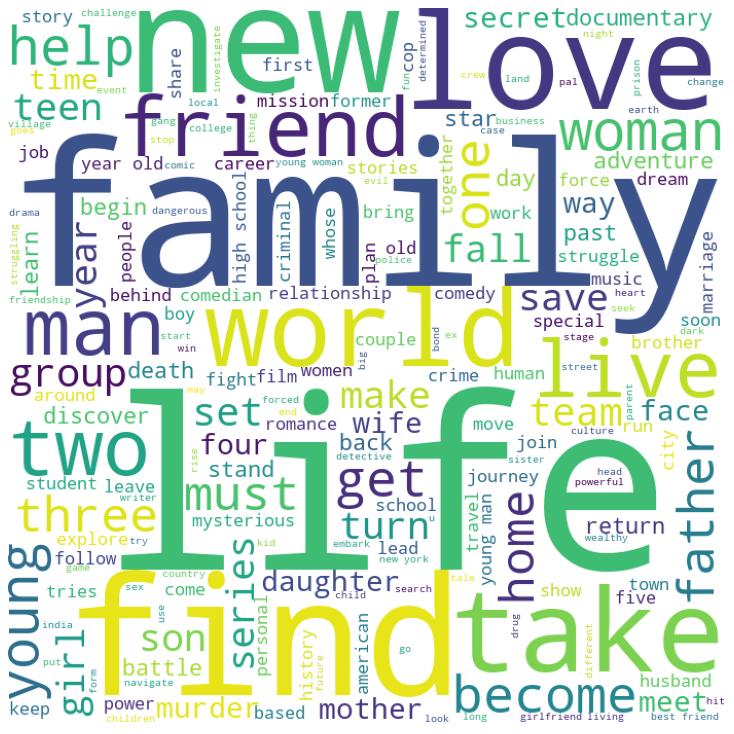

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in new_df.description.values:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites. I've used wordcloud to view words frequently used in the description of the movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Some keywords in Netflix show descriptions are: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Organizations can use these keywords to categorise movies and TV shows.

#### Chart - 6

Text(0.5, 0, 'Year')

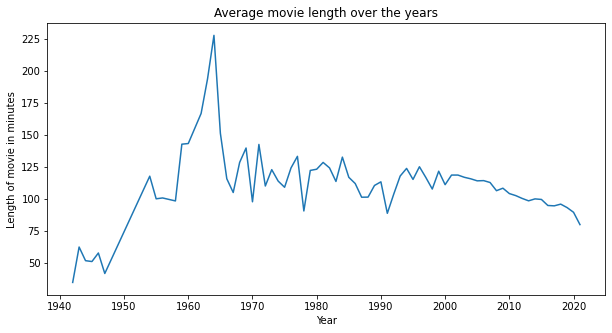

In [ ]:
# Average movie length over the years
plt.figure(figsize=(10,5))
new_df[new_df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

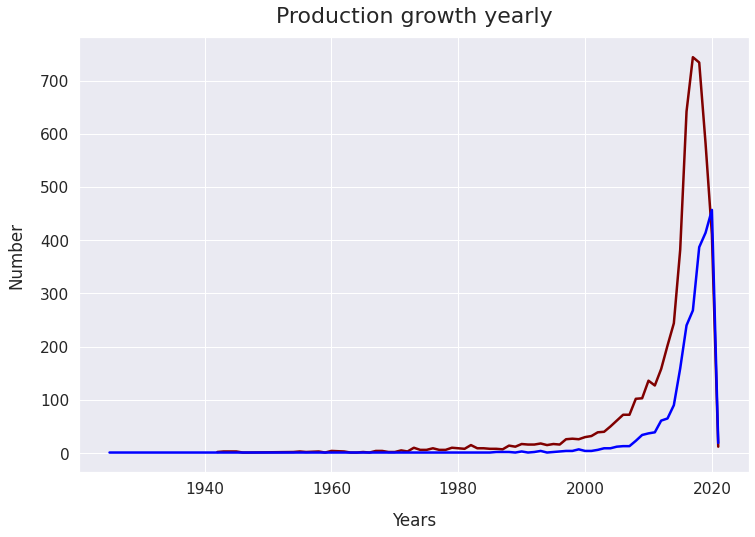

In [ ]:
movies_year = new_df[new_df['type']=='Movie']['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = new_df[new_df['type']=='TV Show']['release_year'].value_counts().sort_index(ascending=False)
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Line charts are used to represent the relation between two data X and Y on a different axis. I've used to represent relation between year and average length of movies in minute.

##### 2. What is/are the insight(s) found from the chart?

* As per the plot, movies made in the 1940s had a fairly short duration on average.
* On average, movies made in the 1960s have the longest movie length.
* The average length of a movie has been continuously decreasing since the 2000s.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Asnwer Here

#### Chart - 7 - Correlation Heatmap

In [ ]:
# Preparing data for heatmap
net_df['count'] = 1
data = net_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = net_df.loc[net_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'],normalize = "index").T

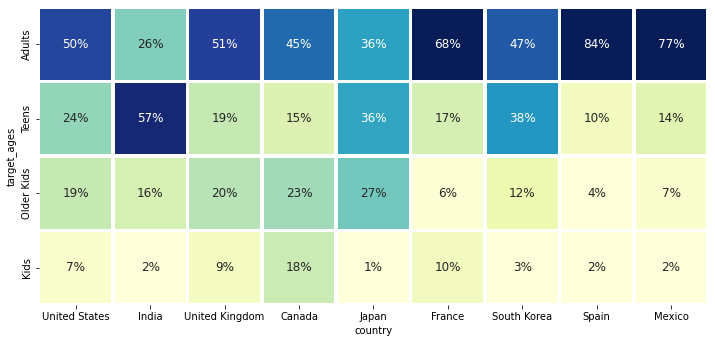

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False, annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan.
* Also, Mexico and Spain have similar content on Netflix for different age groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Movies rated for kids and older kids are not at least two hours long.
* Movies duration is more than 90 minutes.
* Movies rated for kids and older kids are not least 90 minutes long.

In [ ]:
from numpy.linalg import norm
from scipy import stats
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df):
  if t!="true":
    # z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df, hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Movies rated for kids and older kids are not at least two hours long.

Null Hypothesis: N = 120

Alternate Hypothesis : N < 120

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1 = new_df[(new_df["type"] == "Movie")]
hypo_1 = hypo_1[(hypo_1["target_ages"] == "Kids")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 120
sample_mean1 = hypo_1["minute"].mean()
size1 = len(hypo_1)
std1 = (variance(hypo_1["minute"]))**0.5

In [ ]:
# Getting Z value
z1 = findz.mean(hypothesis_number, sample_mean1, size1, std1)
# Getting P - Value
p1 = p_value(z=z1, tailed='l', t="false", hypothesis_number=hypothesis_number, df=hypo_1["minute"])

# Getting Conclusion
print(conclusion(p1))

Null Hypothesis rejected Successfully for p = -27.549657996425058


In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2 = new_df[(new_df["type"] == "Movie")]
hypo_2 = hypo_2[(hypo_2["target_ages"] == "Older Kids")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 120
sample_mean2 = hypo_2["minute"].mean()
size2 = len(hypo_2)
std2 = (variance(hypo_2["minute"]))**0.5

In [ ]:
# Getting Z value
z2 = findz.mean(hypothesis_number, sample_mean2, size2, std2)
# Getting P - Value
p2 = p_value(z=z2, tailed='l', t="false", hypothesis_number=hypothesis_number, df=hypo_2["minute"])

# Getting Conclusion
print(conclusion(p2))

Null Hypothesis rejected Successfully for p = -26.186855924798014


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and found true that if Moview rated for Kids or Older kids are at least two hour long.

##### Why did you choose the specific statistical test?

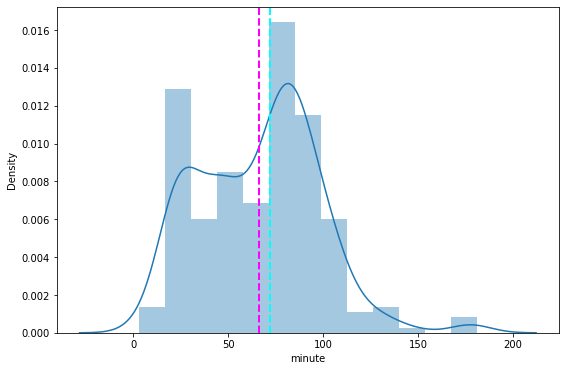

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["minute"])
sns.distplot(hypo_1["minute"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

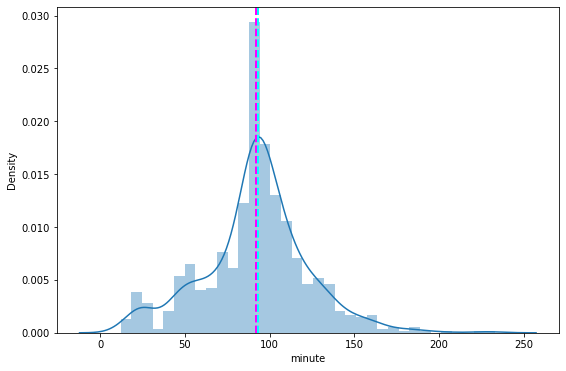

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["minute"])
sns.distplot(hypo_2["minute"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Movies duration is more than 90 minutes.

Null Hypothesis : N = 90

Alternate Hypothesis : N > 90

Test Type : Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3 = new_df[(new_df["type"] == "Movie")]
# Getting the required parameter values for hypothesis testing
hypothesis_number2 = 90
sample_mean3 = hypo_3["minute"].mean()
size3 = len(hypo_3)
std3 = (variance(hypo_3["minute"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number2, sample_mean3, size3, std3)
# Getting P - Value
p = p_value(z=z, tailed='r', t="false", hypothesis_number=hypothesis_number2, df=hypo_3['minute'])
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = -22.922700720669898


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and not all movies are longer than 90 minutes.

##### Why did you choose the specific statistical test?

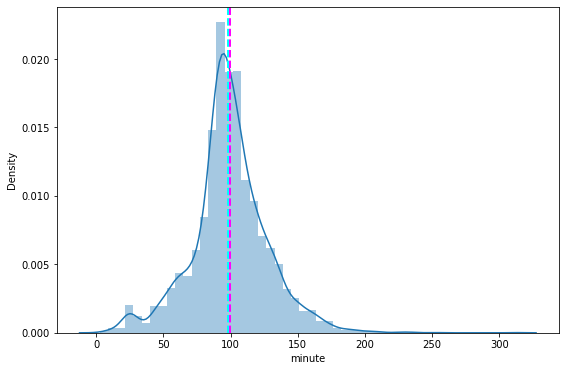

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["minute"])
sns.distplot(hypo_3["minute"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Movies rated for kids and older kids are not least 90 minutes long.

Null Hypothesis H0: N = 90

Alternate Hypothesis H1: N > 90

Test: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_4 = new_df[(new_df["type"]=='Movie')]
# Getting the required parameter values for hypothesis testing
hypothesis_number3 = 90
sample_mean4 = hypo_4["minute"].mean()
size4 = len(hypo_4)
std4 = (variance(hypo_4["minute"]))**0.5

In [ ]:
# Getting Z value
z4 = findz.mean(hypothesis_number3, sample_mean4, size4, std4)
# Getting P - Value
p4 = p_value(z=z4, tailed='l', t="false", hypothesis_number=hypothesis_number3, df=hypo_4['minute'])
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = -22.922700720669898


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and movies rated with Adults is atleast 90 minutes long.

##### Why did you choose the specific statistical test?

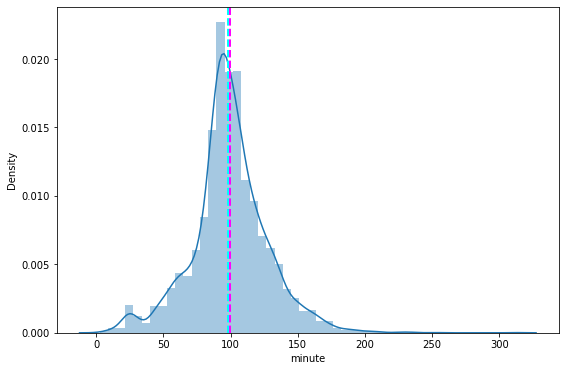

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_4["minute"])
sns.distplot(hypo_4["minute"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
new_df['country'] = new_df['country'].fillna('Others')

In [ ]:
new_df['director'] = new_df['director'].fillna('Unknown')
new_df['cast'] = new_df['cast'].fillna('Unknown')
new_df['rating'] = new_df['rating'].fillna('Unknown')

In [ ]:
new_df = new_df.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Replaced null values in country with 'Others'.
* Replaced null values in director, cast and rating with 'Unknown'.
* Dropped rest of the null values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in new_df.describe().columns:
  if abs(new_df[i].mean()-new_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.pop()

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['release_year', 'duration', 'month', 'minute']


'minute'

##### What all outlier treatment techniques have you used and why did you use those techniques?

As we can see there is not any symettrically distributed feature in the dataset. Hence, outlier treatment is not required.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not doing any categorical encoding.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
clust_df = new_df.copy()
# combining all text for clustering
clust_df['clustering_all_attributes'] = (net_df['director'] + ' ' + 
                                      net_df['cast'] +' ' + 
                                      net_df['country'] +' ' + 
                                      net_df['listed_in'] +' ' + 
                                      net_df['description'])

In [ ]:
# combining all clustering except desciption
clust_df['clustering_attributes'] = (net_df['director'] + ' ' + 
                                      net_df['cast'] +' ' + 
                                      net_df['country'] +' ' + 
                                      net_df['listed_in'])

In [ ]:
# taking desciption for clusterong
clust_df['clustering_description'] = (net_df['description'])

#### 2. Lower Casing

In [ ]:
# Lower Casing
clust_df['clustering_all_attributes'] = clust_df['clustering_all_attributes'].str.lower()
clust_df['clustering_attributes'] = clust_df['clustering_attributes'].str.lower()
clust_df['clustering_description'] = clust_df['clustering_description'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
clust_df['clustering_all_attributes'] = clust_df['clustering_all_attributes'].str.replace('[{}]'.format(string.punctuation), '')
clust_df['clustering_attributes'] = clust_df['clustering_attributes'].str.replace('[{}]'.format(string.punctuation), '')
clust_df['clustering_description'] = clust_df['clustering_description'].str.replace('[{}]'.format(string.punctuation), '')

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs
clust_df['clustering_all_attributes'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
clust_df['clustering_attributes'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
clust_df['clustering_description'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: clustering_description, Length: 7770, dtype: object

In [ ]:
# Remove digits
clust_df['clustering_all_attributes'].str.replace('\d+', '')
clust_df['clustering_attributes'].str.replace('\d+', '')
clust_df['clustering_description'].str.replace('\d+', '')

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: clustering_description, Length: 7770, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
clust_df['clustering_all_attributes'] = clust_df['clustering_all_attributes'].fillna('unknown')
clust_df['clustering_attributes'] = clust_df['clustering_attributes'].fillna('unknown')
clust_df['clustering_description'] = clust_df['clustering_description'].fillna('unknown')

In [ ]:
# Remove Stopwords
clust_df['clustering_all_attributes'] = clust_df['clustering_all_attributes'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
clust_df['clustering_attributes'] = clust_df['clustering_attributes'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
clust_df['clustering_description'] = clust_df['clustering_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [ ]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
# Remove White spaces
clust_df['clustering_all_attributes'] = remove_spaces(clust_df['clustering_all_attributes'])
clust_df['clustering_attributes'] = remove_spaces(clust_df['clustering_attributes'])
clust_df['clustering_description'] = remove_spaces(clust_df['clustering_description'])

#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
# Tokenization
clust_df['clustering_all_attributes'] = clust_df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))
clust_df['clustering_attributes'] = clust_df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))
clust_df['clustering_description'] = clust_df['clustering_description'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [ ]:
# function to lemmatize the corpus
nlp = spacy.load('en_core_web_sm')
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
# Lemmatization
clust_df['clustering_all_attributes'] = lemmatization_(clust_df['clustering_all_attributes'])
clust_df['clustering_attributes'] = lemmatization_(clust_df['clustering_attributes'])
clust_df['clustering_description'] = lemmatization_(clust_df['clustering_description'])

##### Which text normalization technique have you used and why?

Answer Here.

#### 9 Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

In [ ]:
# clustering tokens saved in a variable
clustering_data = clust_df['clustering_all_attributes']
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

In [ ]:
# clustering tokens saved in a variable
clustering_data = clust_df['clustering_attributes']
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)    
Y = tfidf.fit_transform(clustering_data)

In [ ]:
# convert X into array form for clustering
# Y = Y.toarray()

In [ ]:
# clustering tokens saved in a variable
clustering_data = clust_df['clustering_description']
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)    
Z = tfidf.fit_transform(clustering_data)

In [ ]:
# convert X into array form for clustering
# Z = Z.toarray()

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique. TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf). The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative. It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on. Other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Feature selection is not required.

##### Which all features you found important and why?

Feature selection is not required.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Data splitting not required as the only ategorical data available in dataset is being used for clustering.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

#### 1 Taking all text Attributes

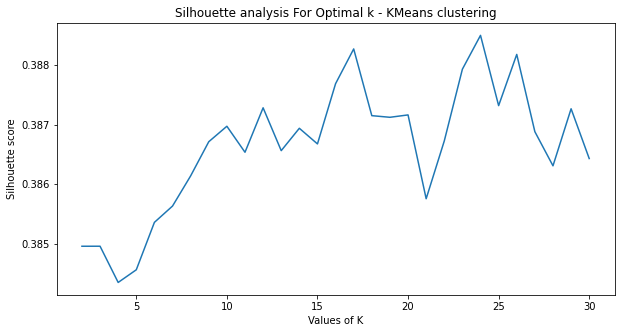

In [ ]:
# Plotting Silhouette score for different number of clusters for all text attributes except description
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 24 clusters.

In [ ]:
# Create K-Means Model with 24 clusters
modelkmeansx = KMeans(n_clusters=24, init='k-means++', random_state=42).fit(X)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion_x = modelkmeansx.inertia_
kmeans_silhouette_score_x = silhouette_score(X, modelkmeansx.labels_)
# Adding a kmeans cluster number attribute
new_df['kmeans_cluster_x'] = modelkmeansx.labels_

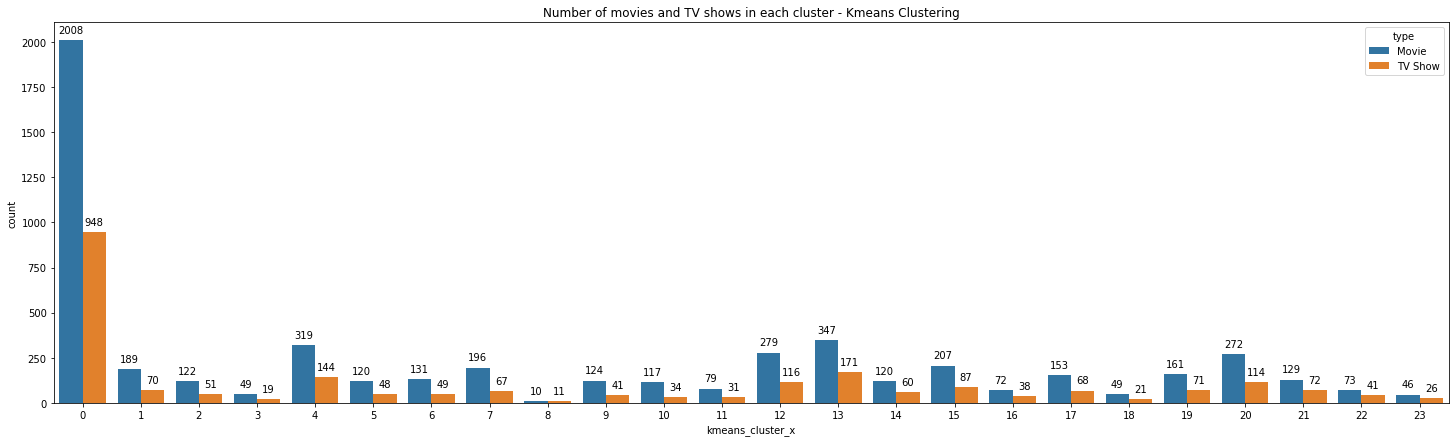

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(25,7))
q = sns.countplot(x='kmeans_cluster_x',data=new_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
netflix_pred = modelkmeansx.fit_predict(X)
#Adding a seperate column for the cluster
new_df["clusterx"] = netflix_pred

#### 2 Taking all text attributes excluding description

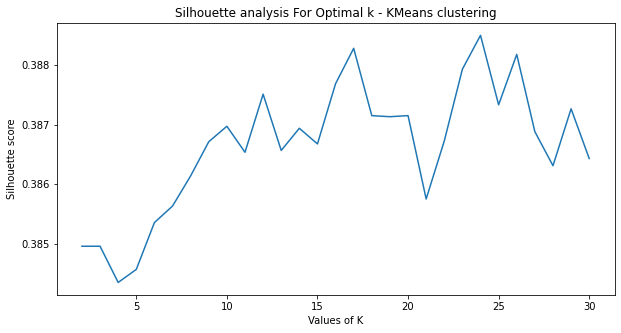

In [ ]:
# Plotting Silhouette score for different number of clusters for all text attributes except description
range_n_clusters = range(2,31)
silhouette_avg2 = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(Y)
  cluster_labels2 = kmeans.labels_
 
  # silhouette score
  silhouette_avg2.append(silhouette_score(Y, cluster_labels2))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg2)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 24 clusters.

In [ ]:
# Create K-Means Model with 24 clusters
modelkmeans = KMeans(n_clusters=24, init='k-means++', random_state=42).fit(Y)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion_y = modelkmeans.inertia_
kmeans_silhouette_score_y = silhouette_score(Y, modelkmeans.labels_)
# Adding a kmeans cluster number attribute
new_df['kmeans_cluster_y'] = modelkmeans.labels_

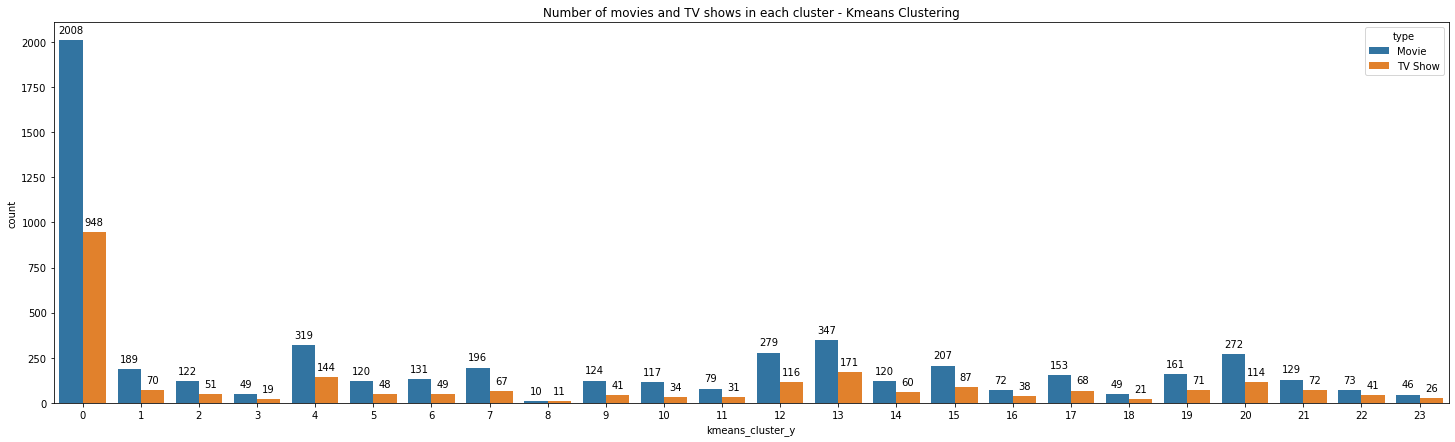

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(25,7))
q = sns.countplot(x='kmeans_cluster_y',data=new_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
netflixy_pred = modelkmeans.fit_predict(Y)
#Adding a seperate column for the cluster
new_df["clustery"] = netflixy_pred

#### 3 Taking single attribute description

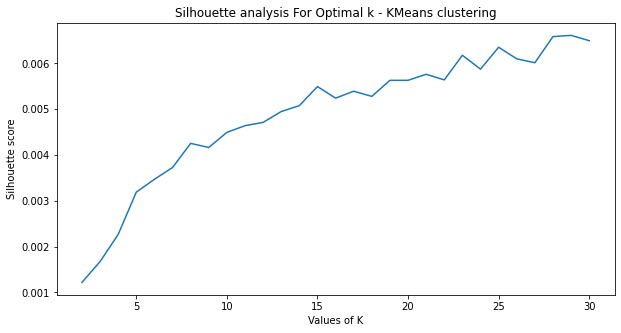

In [ ]:
# Plotting Silhouette score for different number of clusters for description only
range_n_clusters = range(2,31)
silhouette_avg3 = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(Z)
  cluster_labels3 = kmeans.labels_
 
  # silhouette score
  silhouette_avg3.append(silhouette_score(Z, cluster_labels3))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg3)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 30 clusters.



In [ ]:
# Create K-Means Model with 30 clusters
modelkmeansz = KMeans(n_clusters=30, init='k-means++', random_state=42).fit(Z)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion_z = modelkmeansz.inertia_
kmeans_silhouette_score_z = silhouette_score(Z, modelkmeansz.labels_)
# Adding a kmeans cluster number attribute
new_df['kmeans_cluster_z'] = modelkmeansz.labels_

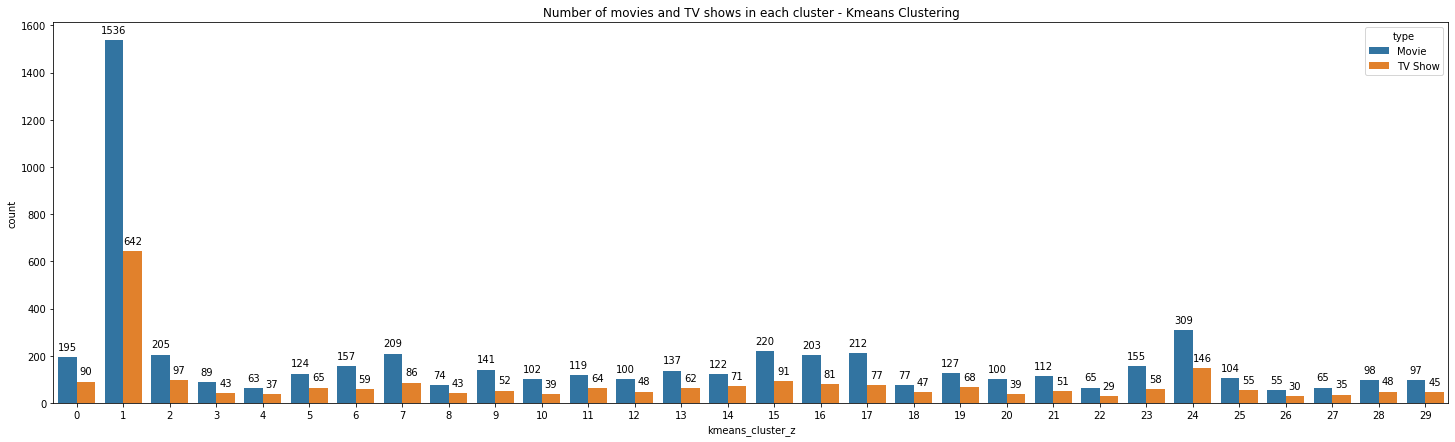

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(25,7))
q = sns.countplot(x='kmeans_cluster_z',data=new_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
netflixz_pred = modelkmeansz.fit_predict(Z)
#Adding a seperate column for the cluster
new_df["clusterz"] = netflixz_pred

### Explain clustering model created.

Three different models created using K-Means Clustering to cluster the movies and TV shows:
* One based on all categorical attributes.
* Second based on all Categorical attributes excluding description.
* Third based on description only.

After finding number of cluster required evaluation done on the models:
* 24 clusters for first model.
* 24 clusters for second model.
* 30 clusters for third model


## 8. Recommender system

### 1. Content Based Recommender system

In [ ]:
def recommended_top_10(title, cluster_number):
  try:
    recommend_content = []   
    temp_df = new_df[new_df.clusterx == cluster_number][0:10]
    top10 = list(temp_df[0:11])
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(i)
    print("If you liked '"+title+"', you may also enjoy:\n")
    return temp_df[['type', 'title', 'director', 'cast', 'country', 'release_year', 'rating', 'duration', 'listed_in', 'description']][0:11]

  except:
    return 'Invalid Entry'

In [ ]:
# Get cluster number from given movie or TV show
cluster_num = new_df[new_df.title=='Stranger Things'].clusterx.item()
recommended_top_10('Stranger Things', cluster_num)

If you liked 'Stranger Things', you may also enjoy:



,type,title,director,cast,country,release_year,rating,duration,listed_in,description
2,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],2011,R,78,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
31,Movie,#FriendButMarried,[Rako Prijanto],"[Adipati Dolken, Vanesha Prescilla, Rendi Jhon...",[Indonesia],2018,TV-G,102,"[Dramas, International Movies, Romantic Movies]","Pining for his high school crush for years, a ..."
32,Movie,#FriendButMarried 2,[Rako Prijanto],"[Adipati Dolken, Mawar de Jongh, Sari Nila, Vo...",[Indonesia],2020,TV-G,104,"[Dramas, International Movies, Romantic Movies]",As Ayu and Ditto finally transition from best ...
40,Movie,Çarsi Pazar,[Muharrem Gülmez],"[Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem ...",[Turkey],2015,TV-14,97,"[Comedies, International Movies]",The slacker owner of a public bath house ralli...
41,Movie,Ég man þig,[Óskar Thór Axelsson],"[Jóhannes Haukur Jóhannesson, Ágústa Eva Erlen...",[Iceland],2017,TV-MA,106,"[Horror Movies, International Movies]","Young urbanites renovating a rundown house, an..."
42,Movie,Çok Filim Hareketler Bunlar,[Ozan Açıktan],"[Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Bur...",[Turkey],2010,TV-MA,99,"[Comedies, International Movies]",Vignettes of the summer holidays follow vacati...
57,Movie,100% Halal,[Jastis Arimba],"[Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitr...",[Indonesia],2020,TV-14,101,"[Dramas, International Movies]","After high school, a young woman marries the m..."
71,Movie,16 Blocks,[Richard Donner],"[Bruce Willis, Mos Def, David Morse, Jenna Ste...","[United States, Germany]",2006,PG-13,102,[Action & Adventure],Tasked with escorting a prosecution witness to...
90,Movie,25 Kille,[Simranjit Singh Hundal],"[Guggu Gill, Yograj Singh, Sonia Mann, Jimmy S...",[India],2016,TV-14,140,"[Action & Adventure, Dramas, International Mov...",Four brothers learn that they have inherited a...
97,Movie,3 Deewarein,[Nagesh Kukunoor],"[Naseeruddin Shah, Jackie Shroff, Juhi Chawla,...",Others,2003,TV-MA,121,"[Dramas, International Movies, Thrillers]",A reporter interviews three convicts on death ...


In [ ]:
# Get cluster number from given movie or TV show
cluster_num2 = new_df[new_df.title=='Stranger Things'].clustery.item()
recommended_top_10('Stranger Things', cluster_num2)

If you liked 'Stranger Things', you may also enjoy:



,type,title,director,cast,country,release_year,rating,duration,listed_in,description
2,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],2011,R,78,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
31,Movie,#FriendButMarried,[Rako Prijanto],"[Adipati Dolken, Vanesha Prescilla, Rendi Jhon...",[Indonesia],2018,TV-G,102,"[Dramas, International Movies, Romantic Movies]","Pining for his high school crush for years, a ..."
32,Movie,#FriendButMarried 2,[Rako Prijanto],"[Adipati Dolken, Mawar de Jongh, Sari Nila, Vo...",[Indonesia],2020,TV-G,104,"[Dramas, International Movies, Romantic Movies]",As Ayu and Ditto finally transition from best ...
40,Movie,Çarsi Pazar,[Muharrem Gülmez],"[Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem ...",[Turkey],2015,TV-14,97,"[Comedies, International Movies]",The slacker owner of a public bath house ralli...
41,Movie,Ég man þig,[Óskar Thór Axelsson],"[Jóhannes Haukur Jóhannesson, Ágústa Eva Erlen...",[Iceland],2017,TV-MA,106,"[Horror Movies, International Movies]","Young urbanites renovating a rundown house, an..."
42,Movie,Çok Filim Hareketler Bunlar,[Ozan Açıktan],"[Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Bur...",[Turkey],2010,TV-MA,99,"[Comedies, International Movies]",Vignettes of the summer holidays follow vacati...
57,Movie,100% Halal,[Jastis Arimba],"[Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitr...",[Indonesia],2020,TV-14,101,"[Dramas, International Movies]","After high school, a young woman marries the m..."
71,Movie,16 Blocks,[Richard Donner],"[Bruce Willis, Mos Def, David Morse, Jenna Ste...","[United States, Germany]",2006,PG-13,102,[Action & Adventure],Tasked with escorting a prosecution witness to...
90,Movie,25 Kille,[Simranjit Singh Hundal],"[Guggu Gill, Yograj Singh, Sonia Mann, Jimmy S...",[India],2016,TV-14,140,"[Action & Adventure, Dramas, International Mov...",Four brothers learn that they have inherited a...
97,Movie,3 Deewarein,[Nagesh Kukunoor],"[Naseeruddin Shah, Jackie Shroff, Juhi Chawla,...",Others,2003,TV-MA,121,"[Dramas, International Movies, Thrillers]",A reporter interviews three convicts on death ...


In [ ]:
# Get cluster number from given movie or TV show
cluster_num3 = new_df[new_df.title=='Stranger Things'].clusterz.item()
recommended_top_10('Stranger Things', cluster_num3)

If you liked 'Stranger Things', you may also enjoy:



,type,title,director,cast,country,release_year,rating,duration,listed_in,description
34,Movie,#Roxy,[Michael Kennedy],"[Jake Short, Sarah Fisher, Booboo Stewart, Dan...",[Canada],2018,TV-14,105,"[Comedies, Romantic Movies]",A teenage hacker with a huge nose helps a cool...
116,Movie,4th Republic,[Ishaya Bako],"[Kate Henshaw-Nuttal, Enyinna Nwigwe, Linda Ej...",[Nigeria],2019,TV-MA,120,"[Dramas, International Movies, Thrillers]",After the election-night murder of her campaig...
163,Movie,A Cinderella Story,[Mark Rosman],"[Hilary Duff, Chad Michael Murray, Jennifer Co...","[United States, Canada]",2004,PG,95,"[Children & Family Movies, Comedies]",Teen Sam meets the boy of her dreams at a danc...
181,Movie,A Grand Night In: The Story of Aardman,[Richard Mears],[Julie Walters],[United Kingdom],2015,TV-PG,59,[Documentaries],"Aardman Animations icons Wallace & Gromit, Mor..."
208,Movie,A new Capitalism,Unknown,Unknown,[Brazil],2017,TV-14,76,"[Documentaries, International Movies]",Entrepreneurs worldwide explore alternatives t...
210,Movie,A Night at the Roxbury,[John Fortenberry],"[Will Ferrell, Chris Kattan, Dan Hedaya, Molly...",[United States],1998,PG-13,82,"[Comedies, Cult Movies]","After a run-in with Richard Grieco, dimwits Do..."
212,Movie,A Patch of Fog,[Michael Lennox],"[Stephen Graham, Conleth Hill, Lara Pulver, Ar...",[United Kingdom],2015,TV-MA,92,"[Dramas, Thrillers]",When a guard catches a writer-television host ...
213,TV Show,A Perfect Crime,Unknown,Unknown,[Germany],2020,TV-14,1,"[Crime TV Shows, Docuseries, International TV ...",This docuseries investigates the 1991 killing ...
218,TV Show,A Queen Is Born,[Carla Barros],"[Gloria Groove, Alexia Twister]",[Brazil],2020,TV-14,1,"[International TV Shows, Reality TV]",Gloria Groove and Alexia Twister make drag dre...
224,Movie,A Separation,[Asghar Farhadi],"[Leila Hatami, Peyman Moaadi, Shahab Hosseini,...","[Iran, France]",2011,PG-13,123,"[Dramas, International Movies]","Amid an impasse in his marriage, a father in T..."


### 2. Explain Recommender System Created.

Three different recommender systems were created:
* One is based on all the categorical attributes.
* Second is based on all the categorical attributes excluding description.
* Third is based on description only.

They will take cluster number and movie name give top 10 movies details.

## 9. Future Work (Optional)

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters obtained through the Silhouette score analysis.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.
* I've used director, cast, country, genre, and description attributes here. We can also use other attributes to expand our recommender system.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***